# eCommerce Marketing Analysis
## Tyler Oldham
### 5/4/23
Using machine learning to predict, cluster, and analyze potential customers based on Point-of-Sale data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Clean Data

In [2]:
# Display info of raw data
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Filter NULL values and format StockCode in Tableau Prep

In [3]:
# Display info of cleaned data
df = pd.read_csv('df_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.2  397924 non-null  int64  
 1   Unnamed: 0.1  397924 non-null  int64  
 2   Unnamed: 0    397924 non-null  int64  
 3   InvoiceNo     397924 non-null  int64  
 4   StockCode     397924 non-null  object 
 5   Description   397924 non-null  object 
 6   Quantity      397924 non-null  int64  
 7   InvoiceDate   397924 non-null  object 
 8   UnitPrice     397924 non-null  float64
 9   CustomerID    397924 non-null  int64  
 10  Country       397924 non-null  object 
 11  Subtotal      397924 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 36.4+ MB


In [4]:
# Create a dictionary using StockCode as key and Description as value
# Choose the longest Description in case of conflicting StockCode
stock_dict = {}
for _, row in df.iterrows():
    stockcode = row['StockCode']
    description = row['Description']

    if stockcode not in stock_dict:
        stock_dict[stockcode] = description
    else:
        if len(description) > len(stock_dict[stockcode]):
            stock_dict[stockcode] = description
print(len(stock_dict))

3665


## Sales Analysis

In [5]:
df['Subtotal'] = df['Quantity'] * df['UnitPrice']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.2  397924 non-null  int64  
 1   Unnamed: 0.1  397924 non-null  int64  
 2   Unnamed: 0    397924 non-null  int64  
 3   InvoiceNo     397924 non-null  int64  
 4   StockCode     397924 non-null  object 
 5   Description   397924 non-null  object 
 6   Quantity      397924 non-null  int64  
 7   InvoiceDate   397924 non-null  object 
 8   UnitPrice     397924 non-null  float64
 9   CustomerID    397924 non-null  int64  
 10  Country       397924 non-null  object 
 11  Subtotal      397924 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 36.4+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
print('Top 5 Products by Revenue')
print(df.groupby('StockCode')['Subtotal'].sum().sort_values(ascending=False).head().rename(index=stock_dict)
)

Top 5 Products by Revenue
StockCode
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100603.50
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: Subtotal, dtype: float64


In [8]:
print('Top 5 Products by Quantity')
print(df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head().rename(index=stock_dict)
)

Top 5 Products by Quantity
StockCode
PAPER CRAFT , LITTLE BIRDIE          80995
MEDIUM CERAMIC TOP STORAGE JAR       77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS    54415
SMALL POPCORN HOLDER                 49183
JUMBO BAG RED RETROSPOT              46181
Name: Quantity, dtype: int64


In [9]:
from itertools import combinations
from collections import Counter

# Group items purchased together by 'InvoiceNo'
grouped_items = df.groupby('InvoiceNo')['StockCode'].apply(list)

# Generate item pairs
item_pairs = [list(combinations(items, 2)) for items in grouped_items]

# Flatten the list of item pairs and count their occurrences
item_pair_counts = Counter(pair for pairs in item_pairs for pair in pairs)

# Display the most common item pairs
common_item_pairs = item_pair_counts.most_common()

i = 0
d = 0

while d < 6:
    combo = common_item_pairs[i]
    
    pair = combo[0]
    
    pair1 = stock_dict.get(pair[0], str(pair[0]))
    pair2 = stock_dict.get(pair[1], str(pair[1]))
    n = combo[1]
    
    i += 1
    
    if pair1 != pair2:
        print(f'{pair1} and {pair2}: {n}')
        d += 1
    

GREEN REGENCY TEACUP AND SAUCER and PINK REGENCY TEACUP AND SAUCER: 678
GREEN REGENCY TEACUP AND SAUCER and ROSES REGENCY TEACUP AND SAUCER: 568
JUMBO BAG PINK POLKADOT and JUMBO BAG RED RETROSPOT: 510
PINK REGENCY TEACUP AND SAUCER and ROSES REGENCY TEACUP AND SAUCER: 482
ALARM CLOCK BAKELIKE GREEN and ALARM CLOCK BAKELIKE RED: 477
LUNCH BAG RED RETROSPOT and LUNCH BAG SUKI  DESIGN: 433


In [10]:
df.to_csv('df_clean.csv')

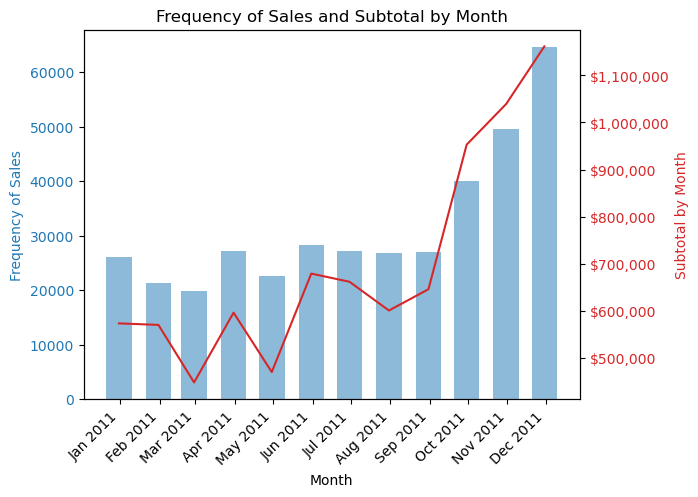

In [11]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# set InvoiceDate as the index
df.set_index('InvoiceDate', inplace=True)

# Resample data to monthly frequency and compute the number of sales and subtotal
monthly_sales = df.resample('M').agg({'InvoiceNo': 'count', 'Subtotal': 'sum'})

# Exclude the last month
monthly_sales = monthly_sales.iloc[:-1]

# Create combo chart
fig, ax1 = plt.subplots()

# Bar chart for the frequency of sales
ax1.bar(monthly_sales.index, monthly_sales['InvoiceNo'], color='tab:blue', alpha=0.5, width=20)
ax1.set_xlabel('Month')
ax1.set_ylabel('Frequency of Sales', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Line chart for the subtotal by month
ax2 = ax1.twinx()
ax2.plot(monthly_sales.index, monthly_sales['Subtotal'], color='tab:red')
ax2.set_ylabel('Subtotal by Month', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set the y-axis format to display as money
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Set the x-axis major ticks to display months
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Format x-axis ticks as "MMM YYYY"
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Add a title and show the chart
plt.title('Frequency of Sales and Subtotal by Month')
plt.show()

## Customer Analysis

In [12]:
# Group by 'CustomerID' and count distinct invoices
customer_invoice_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Count one-time and multiple-time customers
one_time_customers = sum(customer_invoice_counts == 1)
multiple_time_customers = sum(customer_invoice_counts > 1)

print(f"Number of one-time customers: {one_time_customers}")
print(f"Number of multiple-time customers: {multiple_time_customers}")

Number of one-time customers: 1494
Number of multiple-time customers: 2845


In [13]:
print('Top 5 Best Lifetime Customers by Revenue')
print(df.groupby('CustomerID')['Subtotal'].sum().sort_values(ascending=False).head())

Top 5 Best Lifetime Customers by Revenue
CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: Subtotal, dtype: float64


### Customer Clustering by RFM Quartiles

In [14]:
df = pd.read_csv('df_clean.csv', index_col=0)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0.2  397924 non-null  int64         
 1   Unnamed: 0.1  397924 non-null  int64         
 2   Unnamed: 0    397924 non-null  int64         
 3   InvoiceNo     397924 non-null  int64         
 4   StockCode     397924 non-null  object        
 5   Description   397924 non-null  object        
 6   Quantity      397924 non-null  int64         
 7   InvoiceDate   397924 non-null  datetime64[ns]
 8   UnitPrice     397924 non-null  float64       
 9   CustomerID    397924 non-null  int64         
 10  Country       397924 non-null  object        
 11  Subtotal      397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 39.5+ MB


In [15]:
# Calculate the total spending for each customer
customer_spending = df.groupby('CustomerID')['Subtotal'].sum().reset_index()

# Calculate the total number of orders for each customer
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.columns = ['CustomerID', 'NumOrders']

# Calculate the total number of products purchased by each customer
customer_products = df.groupby('CustomerID')['Quantity'].sum().reset_index()

# Merge the dataframes
customer_data = pd.merge(customer_spending, customer_orders, on='CustomerID')
customer_data = pd.merge(customer_data, customer_products, on='CustomerID')

customer_last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_last_purchase.columns = ['CustomerID', 'LastPurchase']

latest_purchase_date = df['InvoiceDate'].max()

# Calculate days before last purchase
customer_last_purchase['LastPurchase'] = (latest_purchase_date - customer_last_purchase['LastPurchase']).dt.days

customer_data = pd.merge(customer_data, customer_last_purchase[['CustomerID', 'LastPurchase']], on='CustomerID')

customer_data = customer_data.rename(columns={'Subtotal': 'Monetary',
                                              'NumOrders': 'Frequency1',
                                              'Quantity': 'Frequency2',
                                              'LastPurchase': 'Recency'})

customer_data['Frequency1'] = customer_data['Frequency1'].astype(float)
customer_data['Frequency2'] = customer_data['Frequency2'].astype(float)
customer_data['Recency'] = customer_data['Recency'].astype(float)

customer_data.head()

,CustomerID,Monetary,Frequency1,Frequency2,Recency
0,12346,77183.60,1.0,74215.0,325.0
1,12347,4310.00,7.0,2458.0,1.0
2,12348,1797.24,4.0,2341.0,74.0
3,12349,1757.55,1.0,631.0,18.0
4,12350,334.40,1.0,197.0,309.0


In [16]:
customer_data['r_percentile'] = customer_data['Recency'].rank(pct=True,ascending=False)
customer_data['r_score'] = pd.qcut(customer_data['r_percentile'], 4, labels=range(4,0,-1), duplicates='drop')

customer_data['f1_percentile'] = customer_data['Frequency1'].rank(pct=True,ascending=True)
customer_data['f1_score'] = pd.qcut(customer_data['f1_percentile'], 4, labels=range(3,0,-1), duplicates='drop')

customer_data['f2_percentile'] = customer_data['Frequency2'].rank(pct=True,ascending=True)
customer_data['f2_score'] = pd.qcut(customer_data['f2_percentile'], 4, labels=range(4,0,-1), duplicates='drop')

customer_data['m_percentile'] = customer_data['Monetary'].rank(pct=True,ascending=True)
customer_data['m_score'] = pd.qcut(customer_data['m_percentile'], 4, labels=range(4,0,-1), duplicates='drop')

customer_data.head()

,CustomerID,Monetary,Frequency1,Frequency2,Recency,r_percentile,r_score,f1_percentile,f1_score,f2_percentile,f2_score,m_percentile,m_score
0,12346,77183.60,1.0,74215.0,325.0,0.037105,4,0.172275,3,0.999078,1,0.997926,1
1,12347,4310.00,7.0,2458.0,1.0,0.968772,1,0.855266,1,0.917032,1,0.922793,1
2,12348,1797.24,4.0,2341.0,74.0,0.380963,3,0.698548,2,0.911270,1,0.768380,1
3,12349,1757.55,1.0,631.0,18.0,0.733349,2,0.172275,3,0.640240,2,0.761927,1
4,12350,334.40,1.0,197.0,309.0,0.053123,4,0.172275,3,0.305716,3,0.283475,3


In [17]:
customer_data['rfm_score'] = customer_data['r_score'].astype(int) + customer_data['f1_score'].astype(int) + customer_data['f2_score'].astype(int) + customer_data['m_score'].astype(int) / 4
customer_data['rfm_score'] = (customer_data['rfm_score'] - customer_data['rfm_score'].min()) / (customer_data['rfm_score'].max() - customer_data['rfm_score'].min())
customer_data['rfm_score'] = abs(customer_data['rfm_score']-1)

In [18]:
customer_data['rfm_group'] = pd.cut(customer_data['rfm_score'],
                                    bins=5,
                                    labels=['Very Low', 'Low', 'Neutral', 'High', 'Very High'])

customer_data.head()

,CustomerID,Monetary,Frequency1,Frequency2,Recency,r_percentile,r_score,f1_percentile,f1_score,f2_percentile,f2_score,m_percentile,m_score,rfm_score,rfm_group
0,12346,77183.60,1.0,74215.0,325.0,0.037105,4,0.172275,3,0.999078,1,0.997926,1,0.428571,Neutral
1,12347,4310.00,7.0,2458.0,1.0,0.968772,1,0.855266,1,0.917032,1,0.922793,1,1.000000,Very High
2,12348,1797.24,4.0,2341.0,74.0,0.380963,3,0.698548,2,0.911270,1,0.768380,1,0.657143,High
3,12349,1757.55,1.0,631.0,18.0,0.733349,2,0.172275,3,0.640240,2,0.761927,1,0.542857,Neutral
4,12350,334.40,1.0,197.0,309.0,0.053123,4,0.172275,3,0.305716,3,0.283475,3,0.142857,Very Low


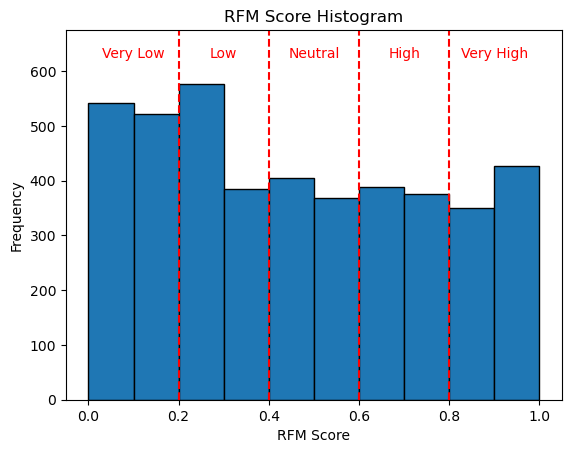

In [19]:
# Create a histogram
plt.hist(customer_data['rfm_score'], bins=10, edgecolor='black')

# Add vertical lines
for x in [0.2, 0.4, 0.6, 0.8]:
    plt.axvline(x, color='red', linestyle='dashed')

# Add text labels
text_labels = ['Very Low', 'Low', 'Neutral', 'High', 'Very High']
x_coords = [0.1, 0.3, 0.5, 0.7, 0.9]
y_coord = 625

for label, x in zip(text_labels, x_coords):
    plt.text(x, y_coord, label, ha='center', fontsize=10, color='red')

# Add labels and title
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.title('RFM Score Histogram')

# Set y-axis limit
plt.ylim(0, 675)

# Show the plot
plt.show()

In [20]:
customer_data.to_csv('customer_data.csv', index=False)

### Product Prediction Model

#### Prepare data for model

In [21]:
df = pd.read_csv('df_clean.csv', index_col=[0])
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Subtotal
0,0,0,0,541698,15060B,FAIRY CAKE DESIGN UMBRELLA,3,2011-01-20 19:16:00,3.75,14713,United Kingdom,11.25
1,1,1,1,541698,22518,CHILDS GARDEN BRUSH BLUE,2,2011-01-20 19:16:00,2.10,14713,United Kingdom,4.20
2,2,2,2,541698,21705,BAG 500g SWIRLY MARBLES,12,2011-01-20 19:16:00,1.65,14713,United Kingdom,19.80
3,3,3,3,541698,82482,WOODEN PICTURE FRAME WHITE FINISH,1,2011-01-20 19:16:00,2.55,14713,United Kingdom,2.55
4,4,4,4,541698,85206B,PINK FELT EASTER EGG BASKET,8,2011-01-20 19:16:00,1.65,14713,United Kingdom,13.20


In [22]:
customer_data = pd.read_csv('customer_data.csv', index_col=['CustomerID'])
customer_data.head()

,Monetary,Frequency1,Frequency2,Recency,r_percentile,r_score,f1_percentile,f1_score,f2_percentile,f2_score,m_percentile,m_score,rfm_score,rfm_group
CustomerID,,,,,,,,,,,,,,
12346,77183.60,1.0,74215.0,325.0,0.037105,4,0.172275,3,0.999078,1,0.997926,1,0.428571,Neutral
12347,4310.00,7.0,2458.0,1.0,0.968772,1,0.855266,1,0.917032,1,0.922793,1,1.000000,Very High
12348,1797.24,4.0,2341.0,74.0,0.380963,3,0.698548,2,0.911270,1,0.768380,1,0.657143,High
12349,1757.55,1.0,631.0,18.0,0.733349,2,0.172275,3,0.640240,2,0.761927,1,0.542857,Neutral
12350,334.40,1.0,197.0,309.0,0.053123,4,0.172275,3,0.305716,3,0.283475,3,0.142857,Very Low


In [23]:
def process_data(df):
    
    dummies = pd.get_dummies(df['StockCode'], prefix='StockCode')

    # Concatenate the original DataFrame and the one-hot encoded DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Aggregate the one-hot encoded columns by 'CustomerID'
    result = df.groupby('CustomerID')[dummies.columns].sum()

    # Iterate through all columns except 'CustomerID'
    for column in result.columns:
        if column != 'CustomerID':
            # Normalize the column by subtracting the minimum and dividing by the range
            result[column] = (result[column] - result[column].min()) / (result[column].max() - result[column].min())
    
    # Remove 'StockCode_' from column names
    result.columns = [col.replace('StockCode_', '') for col in result.columns]
    
    # Transpose and rename indeces
    df = np.transpose(result)
    df.index.name = 'StockCode'
    
    df = df[1:]
    
    return df

In [24]:
df = process_data(df)
df.head()

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
StockCode,,,,,,,,,,,,,,,,,,,,,
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=3)

In [26]:
indices

array([[   0,  940, 2062],
       [   1,  821,   66],
       [   2, 1142, 1137],
       ...,
       [3661, 2900, 2513],
       [3662, 3064, 2559],
       [3663, 1202, 1410]])

In [27]:
distances

array([[0.00000000e+00, 8.00000000e-01, 8.25340799e-01],
       [3.33066907e-16, 5.47732983e-01, 5.58761208e-01],
       [0.00000000e+00, 7.06705770e-01, 7.35093529e-01],
       ...,
       [0.00000000e+00, 4.83065862e-01, 5.31188936e-01],
       [0.00000000e+00, 6.46446609e-01, 7.11324865e-01],
       [0.00000000e+00, 5.54924864e-01, 5.89243669e-01]])

#### Create Model

Show nearest items to item '10120'

In [28]:
test_item = '10080'

# get the index for test item
index_for_item = df.index.tolist().index(test_item)

# find the indices for the similar items
sim_items = indices[index_for_item].tolist()

# distances between test item and the similar items
item_distances = distances[index_for_item].tolist()

# the position of test item in the list sim_items
id_item = sim_items.index(index_for_item)

# remove test item from the list sim_items
sim_items.remove(index_for_item)

# remove test item from the list item_distances
item_distances.pop(id_item)

print(f'Nearest items to {test_item} - {stock_dict.get(test_item, str(test_item))}:\n')
print('Distance \tItem')

for i, item in enumerate(sim_items):
    print(f'{item_distances[i]:.3f} \t\t{df.iloc[item].name} - {stock_dict.get(df.iloc[item].name, str(df.iloc[item].name))}')

Nearest items to 10080 - GROOVY CACTUS INFLATABLE:

Distance 	Item
0.800 		22039 - BOTANICAL LILY GIFT WRAP
0.825 		23233 - WRAP POPPIES  DESIGN


In [29]:
test_item = '23167'

# get the index for test item
index_for_item = df.index.tolist().index(test_item)

# find the indices for the similar items
sim_items = indices[index_for_item].tolist()

# distances between test item and the similar items
item_distances = distances[index_for_item].tolist()

# the position of test item in the list sim_items
id_item = sim_items.index(index_for_item)

# remove test item from the list sim_items
sim_items.remove(index_for_item)

# remove test item from the list item_distances
item_distances.pop(id_item)

print(f'Nearest items to {test_item} - {stock_dict.get(test_item, str(test_item))}:\n')
print('Distance \tItem')

for i, item in enumerate(sim_items):
    print(f'{item_distances[i]:.3f} \t\t{df.iloc[item].name} - {stock_dict.get(df.iloc[item].name, str(df.iloc[item].name))}')

Nearest items to 23167 - SMALL CERAMIC TOP STORAGE JAR:

Distance 	Item
0.320 		23166 - MEDIUM CERAMIC TOP STORAGE JAR
0.361 		23165 - LARGE CERAMIC TOP STORAGE JAR


##### Predict purchase likelihood
The code below predicts the purchase likelihood based on similar users for all the items which customer 12346 has not bought. (n_neighbors = 5)

In [30]:
# Copy df
df_temp = df.copy()

# Find the nearest neighbors using NearestNeighbors(n_neighbors=3)
number_neighbors = 5
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

# Convert customer_name to customer_index
user_index = df.columns.tolist().index(12346)

# For t, item_title; m, the row number of t in df
for m,t in list(enumerate(df.index)):
  
  # Find items without purchases by customer 12346
  if df.iloc[m, user_index] == 0:
    sim_items = indices[m].tolist()
    item_distances = distances[m].tolist()
    
    # If current item in list, pop it
    if m in sim_items:
      id_item = sim_items.index(m)
      sim_items.remove(m)
      item_distances.pop(id_item) 

    # Else, pop furthest neighbor to keep same size
    else:
      sim_items = sim_items[:number_neighbors-1]
      item_distances = item_distances[:number_neighbors-1]
        
    # Invert item distance to represent similarity   
    item_similarity = [1-x for x in item_distances]
    item_similarity_copy = item_similarity.copy()
    nominator = 0

    for s in range(0, len(item_similarity)):
      
      # If the customer has not purchased the similar item,
      # ignore the purchase and the similarity in calculating the predicted purchase
      if df.iloc[sim_items[s], user_index] == 0:

        # If the rating is zero, ignore the rating and the similarity in calculating the predicted rating
        if len(item_similarity_copy) == (number_neighbors - 1):
          item_similarity_copy.pop(s)
          
        else:
          item_similarity_copy.pop(s-(len(item_similarity)-len(item_similarity_copy)))

      # If the customer has purchased the similar item,
      # use the purchase and similarity in the calculation
      else:
        nominator = nominator + item_similarity[s]*df.iloc[sim_items[s],user_index]

    # If the number of the purchases is positive
    if len(item_similarity_copy) > 0:
      
      # If the sum of the purchases of the similar items is positive, calculate prediction confidence
      if sum(item_similarity_copy) > 0:
        predicted_r = nominator/sum(item_similarity_copy)

      # Else set confidence to 0
      else:
        predicted_r = 0

    # If all the purchases of the similar items are zero, then confidence should be zero
    else:
      predicted_r = 0

    # Place the predicted purchase into the copy of the original dataset
    df_temp.iloc[m,user_index] = predicted_r

In [31]:
df_temp[12346].sort_values(ascending=False).head(5).rename(index=stock_dict)

StockCode
IVORY WIRE KITCHEN ORGANISER      0.058824
SMALL CERAMIC TOP STORAGE JAR     0.058824
MEDIUM CERAMIC TOP STORAGE JAR    0.058824
LARGE CERAMIC TOP STORAGE JAR     0.058824
GROOVY CACTUS INFLATABLE          0.000000
Name: 12346, dtype: float64

##### Show recommended products for a selected customer

In [32]:
def recommend_items(df, df_temp, user, num_recommended_items, verbose=True):
    
  customer_data = pd.read_csv('customer_data.csv', index_col=['CustomerID'])

  if verbose:
    
    print('The list of the items customer {} has purchased: \n'.format(user))
    print('Item #\t\tItem Name')

    for m in df[df[user] > 0][user].index.tolist():
      print(f'{m}\t\t{stock_dict.get(m, str(m))}')
  
    print()

  recommended_items = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df_temp.iloc[index_df, df_temp.columns.tolist().index(user)]
    recommended_items.append((m, predicted_rating))

  sorted_rm = sorted(recommended_items, key=lambda x:x[1], reverse=True)
  
  if verbose:
    print(f"Predicted Purchase Intent: {customer_data.loc[[user]]['rfm_group'].values[0]}\n")

    print('The list of the recommended items: \n')
    print('Rank \tConfidence \tItem # \tItem Name')

  rank = 1
    
    
  
  rec_list = []
  for recommended_item in sorted_rm[:num_recommended_items]:
    
    rec_list.append(recommended_item[0])
    
    if verbose:
      print(f'{rank} \t{recommended_item[1]:.3f} \t\t{recommended_item[0]} \t{stock_dict[recommended_item[0]]}')
                                                
                                                  
        
    rank = rank + 1
  
  else:
    return rec_list

In [33]:
recommend_items(df, df_temp, 12346, 5)

The list of the items customer 12346 has purchased: 

Item #		Item Name
23166		MEDIUM CERAMIC TOP STORAGE JAR

Predicted Purchase Intent: Neutral

The list of the recommended items: 

Rank 	Confidence 	Item # 	Item Name
1 	0.059 		23142 	IVORY WIRE KITCHEN ORGANISER
2 	0.059 		23165 	LARGE CERAMIC TOP STORAGE JAR
3 	0.059 		23167 	SMALL CERAMIC TOP STORAGE JAR
4 	0.000 		10080 	GROOVY CACTUS INFLATABLE
5 	0.000 		10120 	DOGGY RUBBER


['23142', '23165', '23167', '10080', '10120']

##### Combine the two

In [34]:
def item_recommender(df, user, num_neighbors, num_recommendation, debug=False, verbose=True):

  df_temp = df.copy()

  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_items = indices[m].tolist()
      item_distances = distances[m].tolist()
    
      if m in sim_items:
        id_item = sim_items.index(m)
        sim_items.remove(m)
        item_distances.pop(id_item) 

      else:
        sim_items = sim_items[:number_neighbors-1]
        item_distances = item_distances[:number_neighbors-1]
           
      item_similarity = [1-x for x in item_distances]
      item_similarity_copy = item_similarity.copy()
      nominator = 0

      for s in range(0, len(item_similarity)):
        if df.iloc[sim_items[s], user_index] == 0:
          if len(item_similarity_copy) == (number_neighbors - 1):
            item_similarity_copy.pop(s)
          
          else:
            item_similarity_copy.pop(s-(len(item_similarity)-len(item_similarity_copy)))
            
        else:
          nominator = nominator + item_similarity[s]*df.iloc[sim_items[s],user_index]
          
      if len(item_similarity_copy) > 0:
        if sum(item_similarity_copy) > 0:
          predicted_r = nominator/sum(item_similarity_copy)
          predicted_r = predicted_r * (customer_data.loc[[user]]['rfm_score'] * 2)
          predicted_r[predicted_r >= 1] = 0.99
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df_temp.iloc[m,user_index] = predicted_r
  
  if debug:
    return df, df_temp
  
  else:
    return recommend_items(df, df_temp, user, num_recommendation, verbose)

#### Demo Prediction Function

Run the 'process_data' function periodically for new products.

In [35]:
df = pd.read_csv('df_clean.csv', index_col=[0])
df = process_data(df)
df.head()

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
StockCode,,,,,,,,,,,,,,,,,,,,,
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the 'item_recommender' function on demand, human or automated system

In [36]:
items = item_recommender(df, 12346, 5, 5)
print('returned', items)

The list of the items customer 12346 has purchased: 

Item #		Item Name
23166		MEDIUM CERAMIC TOP STORAGE JAR

Predicted Purchase Intent: Neutral

The list of the recommended items: 

Rank 	Confidence 	Item # 	Item Name
1 	0.050 		23142 	IVORY WIRE KITCHEN ORGANISER
2 	0.050 		23165 	LARGE CERAMIC TOP STORAGE JAR
3 	0.050 		23167 	SMALL CERAMIC TOP STORAGE JAR
4 	0.000 		10080 	GROOVY CACTUS INFLATABLE
5 	0.000 		10120 	DOGGY RUBBER
returned ['23142', '23165', '23167', '10080', '10120']


In [37]:
items = item_recommender(df, 15181, 3, 5)
print('returned', items)

The list of the items customer 15181 has purchased: 

Item #		Item Name
21623		VINTAGE UNION JACK MEMOBOARD
21967		PACK OF 12 SKULL TISSUES
21980		PACK OF 12 RED RETROSPOT TISSUES
21983		PACK OF 12 BLUE PAISLEY TISSUES
21985		PACK OF 12 HEARTS DESIGN TISSUES
21986		PACK OF 12 PINK POLKADOT TISSUES
22665		RECIPE BOX BLUE SKETCHBOOK DESIGN
22740		POLKADOT PEN
22759		SET OF 3 NOTEBOOKS IN PARCEL
22906		12 MESSAGE CARDS WITH ENVELOPES
23500		KEY RING BASEBALL BOOT ASSORTED

Predicted Purchase Intent: Neutral

The list of the recommended items: 

Rank 	Confidence 	Item # 	Item Name
1 	0.257 		21984 	PACK OF 12 PINK PAISLEY TISSUES
2 	0.257 		22741 	FUNKY DIVA PEN
3 	0.206 		22667 	RECIPE BOX RETROSPOT
4 	0.103 		22507 	MEMO BOARD RETROSPOT  DESIGN
5 	0.000 		10080 	GROOVY CACTUS INFLATABLE
returned ['21984', '22741', '22667', '22507', '10080']
